In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from ambiance import Atmosphere
from shapely.geometry import LineString
import sympy as sp
alt=[0,1,2,3,4,5,6,7,8]
#alt=np.linspace(0,7,8)
n=100# size of velocity array
w=580506.8
s=111.63
clmax=1.4
CD0=0.0159
K=0.04244
K1=0.41065
K2=-0.3078
view=200
a=340
Tsv=(2*97900) #static thrust at sea level

In [415]:
v=np.zeros([len(alt),n])
Tr=np.zeros([len(alt),n])
Ta=np.zeros([len(alt),n])
rho=np.zeros(len(alt))
tem=np.zeros(len(alt))
Vmax1=[0]*len(alt)
Tmax1=[0]*len(alt)
y=np.zeros(len(alt))
a=np.zeros(len(alt))
Vs=np.zeros(len(alt))

In [416]:
def f(V):
        return (A*V**2)+(B*V**(-2))
def ff(T):
    return (1.4*288*T)**(0.5)
def fff(X):
    return Tsv*(X/1.22500002)

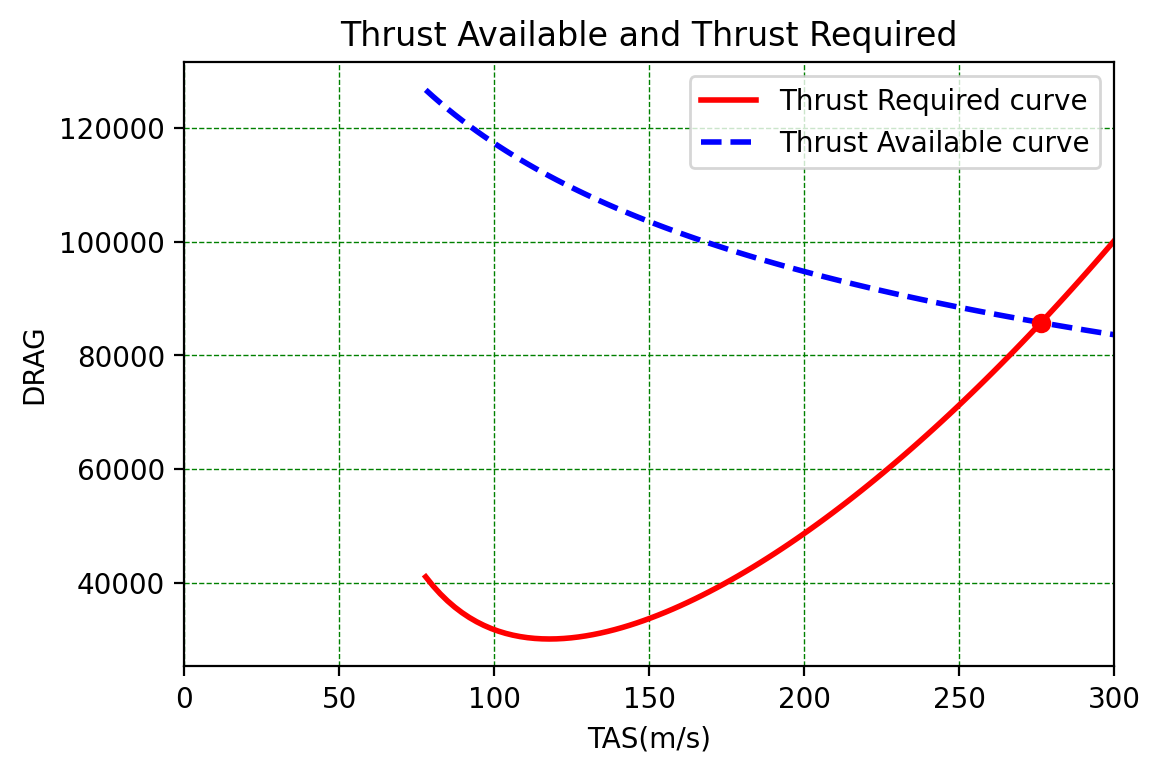

Vmax and Thrust available at 0 km Altitude is [276.3566902135717] and [85768.22055982421] respectively.


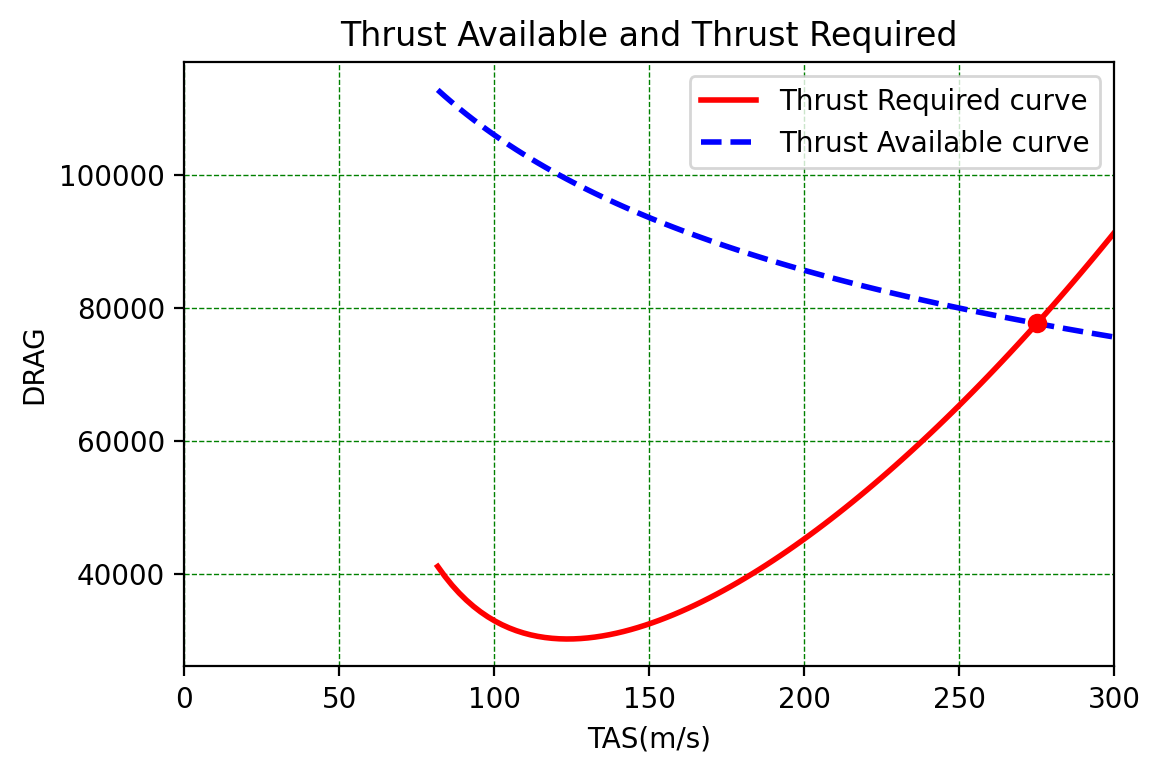

Vmax and Thrust available at 1 km Altitude is [275.034078149793] and [77674.44145971227] respectively.


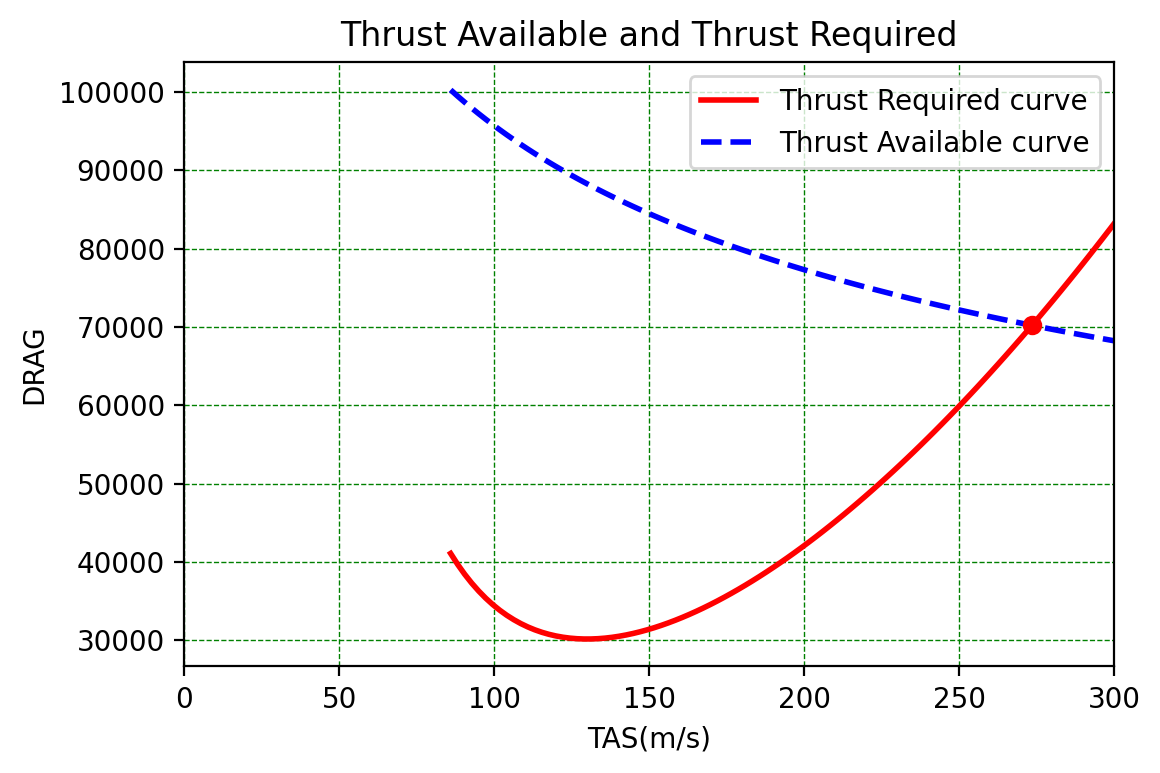

Vmax and Thrust available at 2 km Altitude is [273.45615612524927] and [70202.47940247356] respectively.


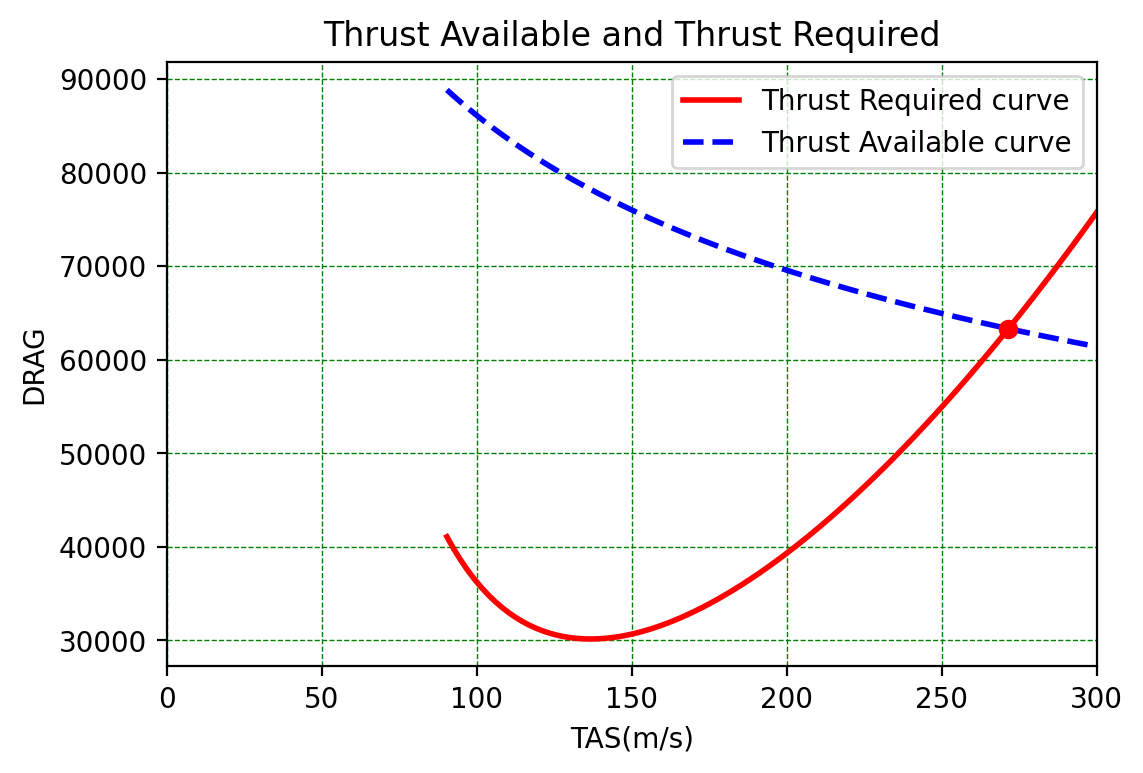

Vmax and Thrust available at 3 km Altitude is [271.5394372568822] and [63320.6105312441] respectively.


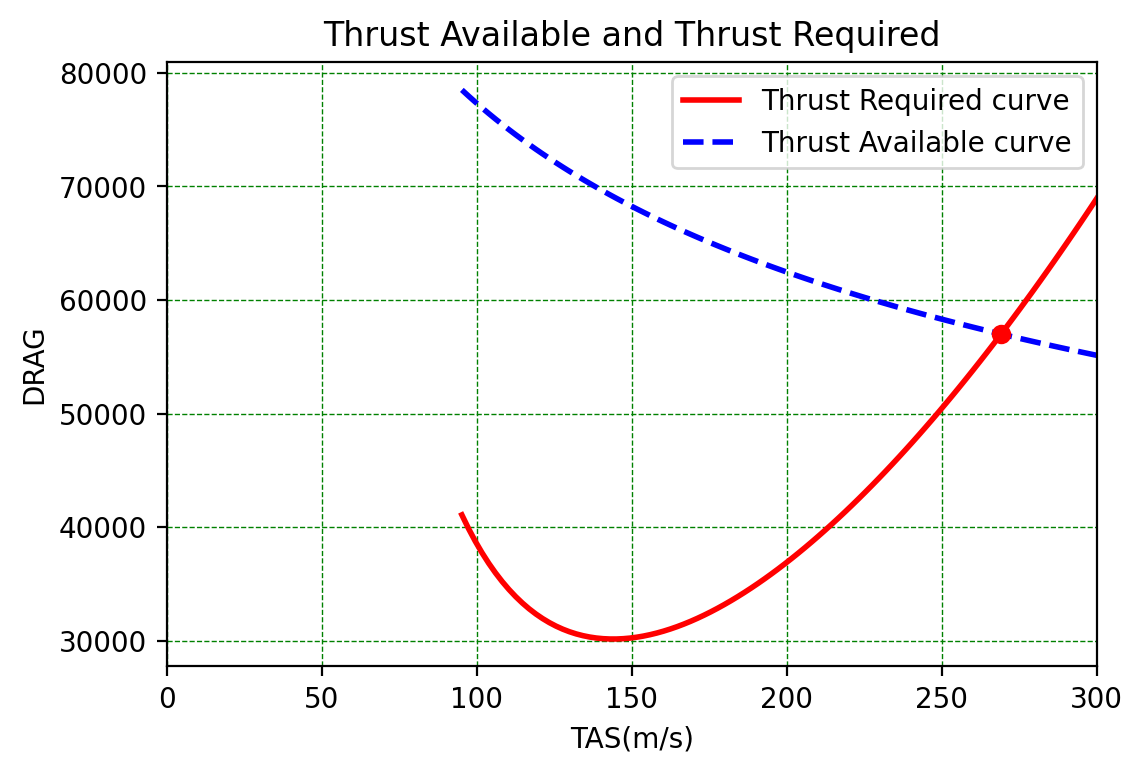

Vmax and Thrust available at 4 km Altitude is [269.1668771296468] and [56998.68691863808] respectively.


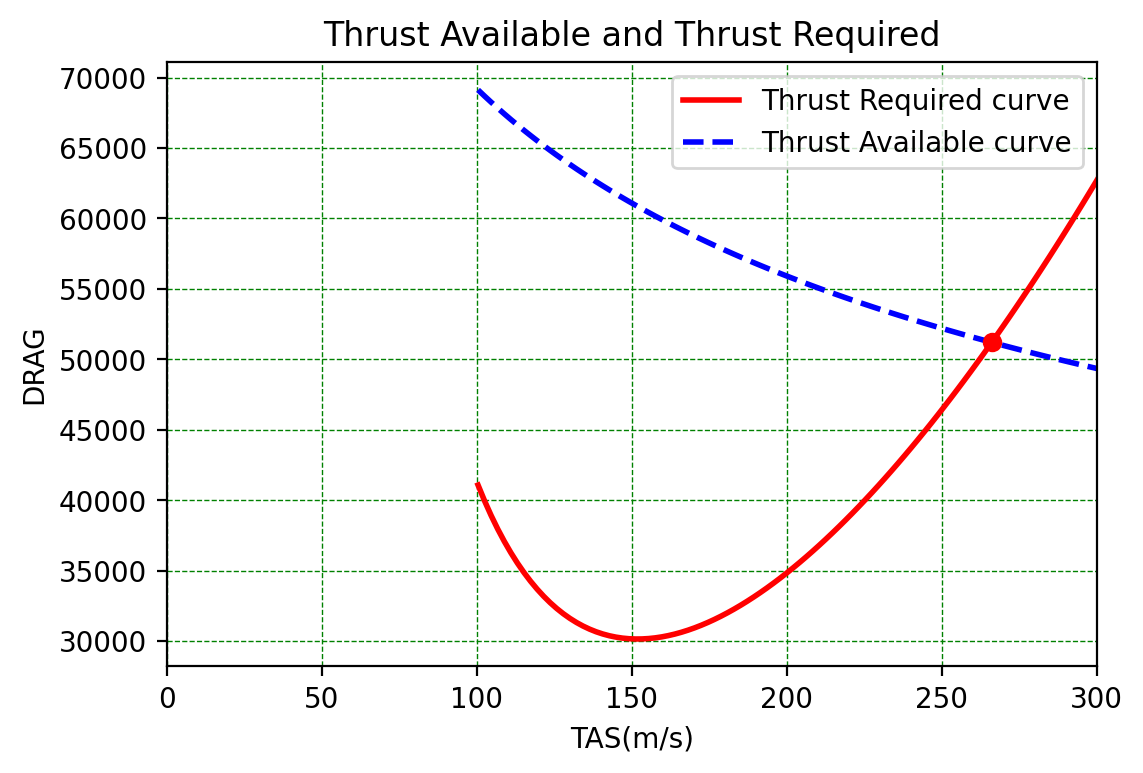

Vmax and Thrust available at 5 km Altitude is [266.1581818083682] and [51210.04326055937] respectively.


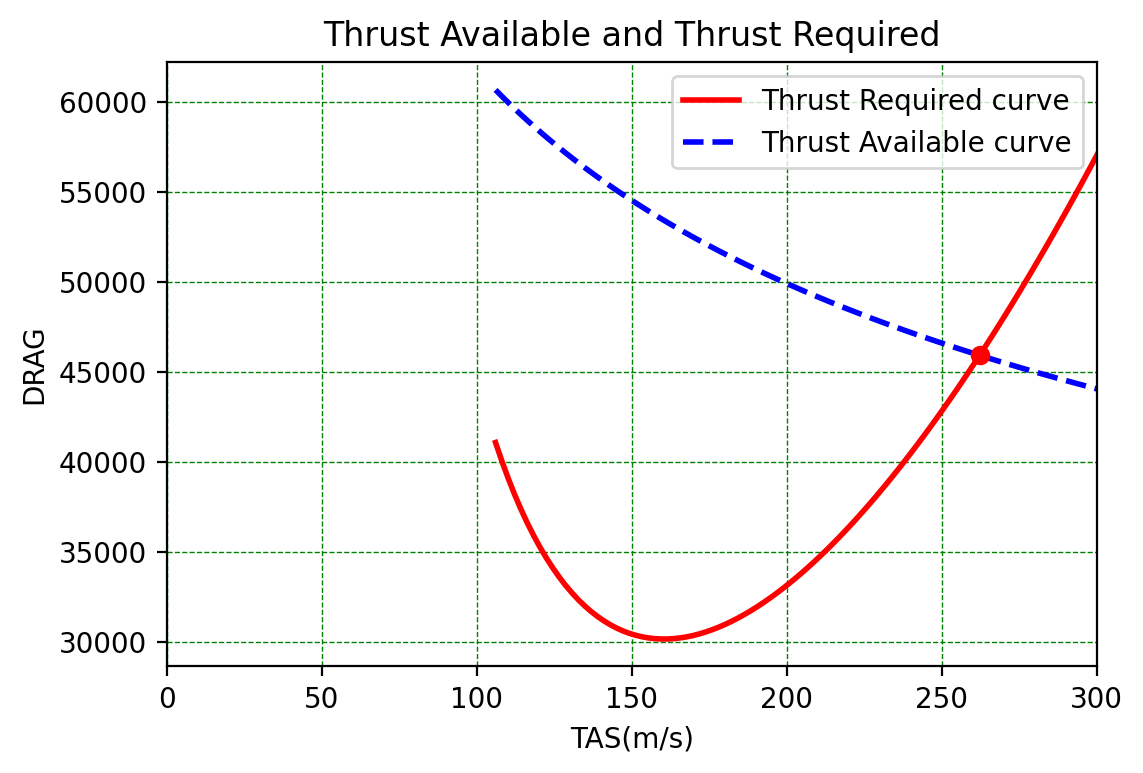

Vmax and Thrust available at 6 km Altitude is [262.2372505322257] and [45931.12702590825] respectively.


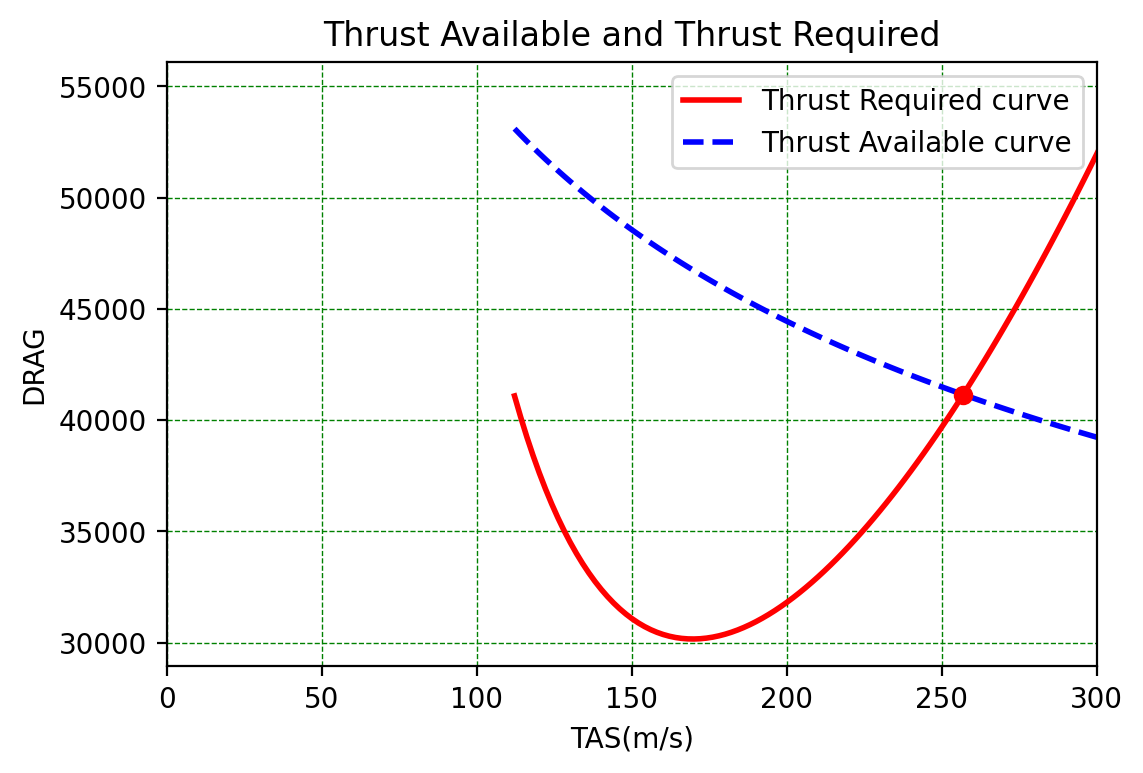

Vmax and Thrust available at 7 km Altitude is [256.93284918020225] and [41145.716490301354] respectively.


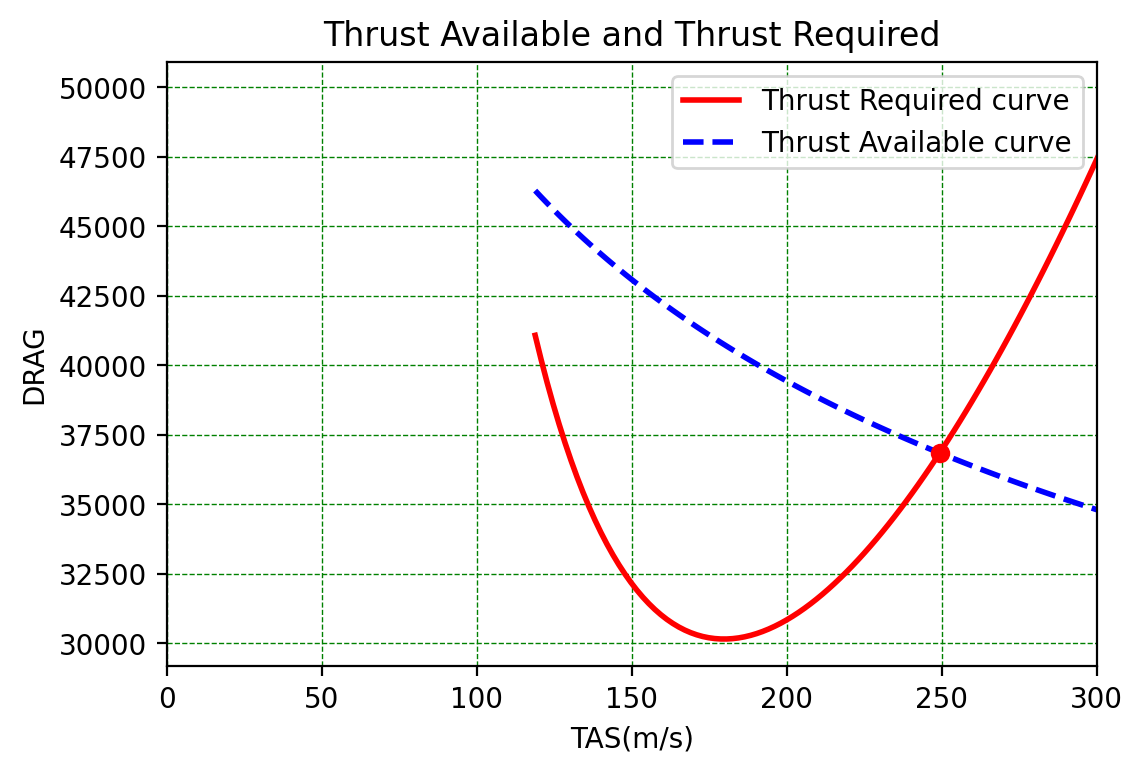

Vmax and Thrust available at 8 km Altitude is [249.35638507365692] and [36851.83305060208] respectively.


In [417]:
for i in range(len(alt)):
    mosphere = Atmosphere(alt[i]*1000)
    #density at various altitudes calculations
    rho[i] = mosphere.density
    tem[i]= mosphere.temperature
    a1=ff(tem[i])
    a[i]=a1
    A=CD0*0.5*rho[i]*s
    B=(K*(w**2))/(rho[i]*0.5*s)
    
    #vstall at vaious altitudes
    
    Vs[i]=((2*w)/(rho[i]*clmax*s))**(0.5)
    v[i]=np.linspace(Vs[i],310,n)
    for j in range(n):
        z=f(v[i][j])
        Tr[i][j]=z
        
        #thrust available
        M=v[i][j]/a[i]
        
        TVV=fff(rho[i])  # thrust variation logic
        yy=TVV*K1*M**(K2)
        Ta[i][j]=yy
#     plt.plot(v[i],Tr[i])
#     plt.plot(v[i],Ta[i])
    plt.figure(num=3,dpi=view)
    plt.plot(v[i],Tr[i],label='Thrust Required curve',linewidth=2,color='red')
    plt.plot(v[i],Ta[i],label='Thrust Available curve',linewidth=2,color='blue',linestyle='dashed')
    plt.title("Thrust Available and Thrust Required")
    plt.ylabel('DRAG')
    plt.xlabel('TAS(m/s)')
    plt.legend()
    plt.xlim([0,300])
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    line_1 = LineString(np.column_stack((v[i],Tr[i])))
    line_2 = LineString(np.column_stack((v[i],Ta[i])))
    intersection = line_1.intersection(line_2)

    plt.plot(*intersection.xy, 'ro')

    plt.show()

    x,y = intersection.xy
    
    
    from array import *
    
    Vmax1[i]= x.tolist()
    Tmax1[i]= y.tolist()
    print("Vmax and Thrust available at %s km Altitude is %s and %s respectively." % (alt[i],Vmax1[i],Tmax1[i]))
    
    

    
   
    
    

In [402]:
arr = np.asarray(Vmax1)
V111=arr.transpose()
Vmax=V111.flatten()
arrr = np.asarray(Tmax1)
T111=arrr.transpose()
Tmax=T111.flatten()
dfb=pd.DataFrame({ 'Altitude':alt,'Density':rho,'Vstall(CL=1.4)':Vs,'Vmax':Vmax,'Tmax':Tmax})
DFB=dfb.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'black'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector' : '',
  'props' : [('border','2px solid black')]},
 
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
]
).hide_index()
display(DFB)

Altitude,Density,Vstall(CL=1.4),Vmax,Tmax
0,1.225000,77.874653,276.356690,85768.220560
1,1.111660,81.748209,275.034078,77674.441460
2,1.006554,85.910389,273.456156,70202.479402
3,0.909254,90.390228,271.539437,63320.610531
4,0.819347,95.220475,269.166877,56998.686919
5,0.736429,100.438183,266.158182,51210.043261
6,0.660111,106.085391,262.237251,45931.127026
7,0.590018,112.209960,256.932849,41145.716490
8,0.525786,118.866551,249.356385,36851.833051
